In [101]:
# imports
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import defaultdict



In [156]:
# Getting the data
maindict = {}

with open('data/cleandata.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)
    for line in reader:
        ints = re.findall(r'\d+', line[2])
        pairs = list(zip(ints[::2], ints[1::2]))
        alpha = [{'year': year, 'visitors': visitor} for year, visitor in pairs]
        maindict[line[0]] = alpha

In [157]:
target_years = set(range(1910, 2021, 10))
year_totals = defaultdict(int)

for park in maindict:
    for entry in maindict[park]:
        year = entry.get('year')
        visitors = entry.get('visitors')

        try:
            year = int(year)
            visitors = int(visitors)
            if year in target_years:
                year_totals[year] += visitors
        except (ValueError, TypeError):
            continue

print(sorted(year_totals.items()))

[(1910, 173416), (1920, 918530), (1930, 2742775), (1940, 7645366), (1950, 14116089), (1960, 29189800), (1970, 50908600), (1980, 53921174), (1990, 64192615), (2000, 73520383), (2010, 71079019), (2020, 68931703)]


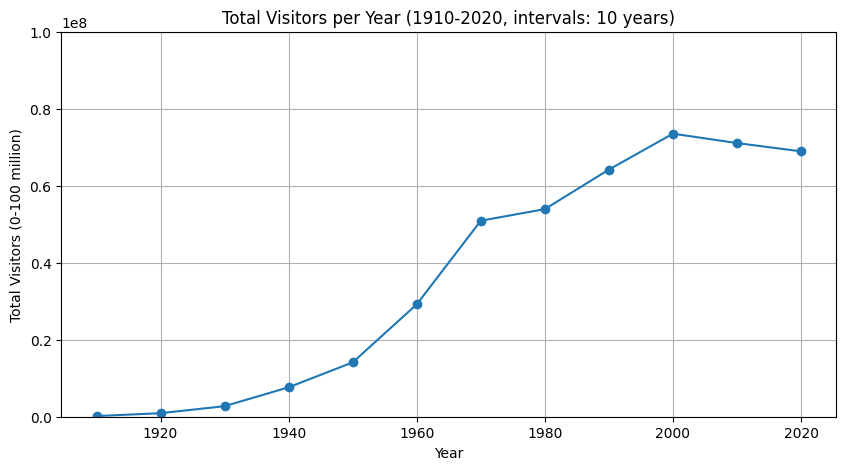

In [164]:
final_years = sorted(year_totals)
final_visitors = [year_totals[y] for y in final_years]

plt.figure(figsize=(10, 5))
plt.plot(final_years, final_visitors, marker='o')
plt.xlabel('Year')
plt.ylabel('Total Visitors (0-100 million)')
plt.ylim(0, 100000000)
plt.title('Total Visitors per Year (1910-2020, intervals: 10 years)')
plt.grid(True)
plt.savefig("lineGraph.png")
plt.show()